# **Programming Homework 1 Instructions (Read First)**

In lecture and in a practical, we saw an implementation of the naive exact matching algorithm:

In [4]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

...and we saw a function that takes a DNA string and returns its reverse complement:

In [5]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t


...and we saw a function that parses a DNA reference genome from a file in the FASTA format.

In [6]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome


...and we saw a function that parses the read and quality strings from a FASTQ file containing sequencing reads.

In [7]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

First, implement a version of the naive exact matching algorithm that is strand-aware. That is, instead of looking only for occurrences of P in T, additionally look for occurrences of thereverse complement of P in T. If P is ACT, your function should find occurrences of both ACTand its reverse complement AGT in T.

If P and its reverse complement are identical (e.g. AACGTT), then a given match offset should be reported only once. So if your new function is called naive_with_rc, then the old naivefunction and your new naive_with_rc function should return the same results when P equals its reverse complement.

Hint: See this notebook for a few examples you can use to test your naive_with_rc function.

Next, download and parse the lambda virus genome, at: https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

In [3]:
from Bio import SeqIO
import Bio

In [8]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2021-07-18 13:31:21--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolviendo d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 65.9.114.156, 65.9.114.155, 65.9.114.31, ...
Conectando con d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)[65.9.114.156]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 49270 (48K) [application/octet-stream]
Grabando a: “lambda_virus.fa”

lambda_virus.fa     100%[===================>]  48.12K  --.-KB/s    en 0.04s   

2021-07-18 13:31:22 (1.27 MB/s) - “lambda_virus.fa” guardado [49270/49270]



In [64]:
virus = readGenome('lambda_virus.fa')

### **Exploratory Data Analysis**

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
print(virus[0:1000])

GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACCCTCTGAAAAGAAAGGAAACGACAGGTGCTGAAAGCGAGGCTTTTTGGCCTCTGTCGTTTCCTTTCTCTGTTTTTGTCCGTGGAATGAACAATGGAAGTCAACAAAAAGCAGCTGGCTGACATTTTCGGTGCGAGTATCCGTACCATTCAGAACTGGCAGGAACAGGGAATGCCCGTTCTGCGAGGCGGTGGCAAGGGTAATGAGGTGCTTTATGACTCTGCCGCCGTCATAAAATGGTATGCCGAAAGGGATGCTGAAATTGAGAACGAAAAGCTGCGCCGGGAGGTTGAAGAACTGCGGCAGGCCAGCGAGGCAGATCTCCAGCCAGGAACTATTGAGTACGAACGCCATCGACTTACGCGTGCGCAGGCCGACGCACAGGAACTGAAGAATGCCAGAGACTCCGCTGAAGTGGTGGAAACCGCATTCTGTACTTTCGTGCTGTCGCGGATCGCAGGTGAAATTGCCAGTATTCTCGACGGGCTCCCCCTGTCGGTGCAGCGGCGTTTTCCGGAACTGGAAAACCGACATGTTGATTTCCTGAAACGGGATATCATCAAAGCCATGAACAAAGCAGCCGCGCTGGATGAACTGATACCGGGGTTGCTGAGTGAATATATCGAACAGTCAGGTTAACAGGCTGCGGCATTTTGTCCGCGCCGGGCTTCGCTCACTGTTCAGGCCGGAGCCACAGACCGCCGTTGAATGGGCGGATGCTAATTACTATCTCCCGAAAGAATCCGCATACCAGGAAGGGCGCTGGGAAACACTGCCCTTTCAGCGGGCCATCATGAATGCGATGGGCAGCGACTACATCCGTGAGGTGAATGTGGTGAAGTCTGCCCGTGTCGGTTATTCCAAAATGCTGCTGGGTGTTTATGCCTACTTTATAGAGCATAA

In [15]:
print(len(virus))

48502


In [16]:
import collections

In [40]:
freq = collections.Counter(virus)

In [42]:
freq = np.array([list(freq.keys()),list(freq.values())])

<BarContainer object of 4 artists>

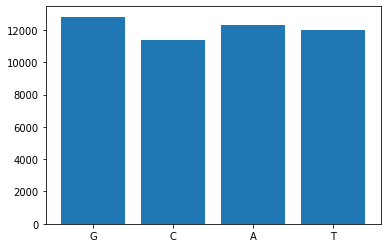

In [55]:
plt.bar(freq[0],freq[1].astype(np.int))

How many times does \verb|AGGT|AGGT or its reverse complement (\verb|ACCT|ACCT) occur in the lambda virus genome?  E.g. if \verb|AGGT|AGGT occurs 10 times and \verb|ACCT|ACCT occurs 12 times, you should report 22.

In [65]:
virusSeq = Bio.Seq.Seq(virus)

In [61]:
q1 = virus.count('AGGT') + virus.count('ACCT')
q1

306

How many times does TTAA or its reverse complement occur in the lambda virus genome? 

Hint: TTAA and its reverse complement are equal, so remember not to double count.

In [62]:
q2 = virus.count('TTAA')
q2

195

What is the offset of the leftmost occurrence of ACTAAGT or its reverse complement in the Lambda virus genome?  E.g. if the leftmost occurrence of ACTAAGT is at offset 40 (0-based) and the leftmost occurrence of its reverse complement ACTTAGT is at offset 29, then report 29.

In [67]:
import re
pattern = 'ACTAAGT'
for match in re.finditer(pattern, virus):
    s = match.start()
    e = match.end()
    print('Found "%s" at %d:%d' % (virus[s:e], s, e))

Found "ACTAAGT" at 27733:27740
Found "ACTAAGT" at 45382:45389


In [69]:
pattern = reverseComplement('ACTAAGT')
for match in re.finditer(pattern, virus):
    s = match.start()
    e = match.end()
    print('Found "%s" at %d:%d' % (virus[s:e], s, e))

Found "ACTTAGT" at 26028:26035


What is the offset of the leftmost occurrence of \verb|AGTCGA|AGTCGA or its reverse complement in the Lambda virus genome?

In [70]:
pattern = 'AGTCGA'
for match in re.finditer(pattern, virus):
    s = match.start()
    e = match.end()
    print('Found "%s" at %d:%d' % (virus[s:e], s, e))

Found "AGTCGA" at 18005:18011
Found "AGTCGA" at 23320:23326
Found "AGTCGA" at 33657:33663
Found "AGTCGA" at 44806:44812


In [71]:
pattern = reverseComplement('AGTCGA')
for match in re.finditer(pattern, virus):
    s = match.start()
    e = match.end()
    print('Found "%s" at %d:%d' % (virus[s:e], s, e))

Found "TCGACT" at 450:456
Found "TCGACT" at 1908:1914
Found "TCGACT" at 2472:2478
Found "TCGACT" at 41927:41933
Found "TCGACT" at 45369:45375


As we will discuss, sometimes we would like to find approximate matches for P in T. That is, we want to find occurrences with one or more differences.

For Questions 5 and 6, make a new version of the \verb|naive|naive function called naive_2mm that allows up to 2 mismatches per occurrence. Unlike for the previous questions, do not consider the reverse complement here.  We're looking for approximate matches for P itself, not its reverse complement.

￼

For example, ACTTTA occurs twice in ACTTACTTGATAAAGT, once at offset 0 with 2 mismatches, and once at offset 4 with 1 mismatch. So naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT') should return the list [0, 4]|[0, 4].

Hint: See  this notebook for a few examples you can use to test your \verb|naive_2mm function.

How many times does TTCAAGCC occur in the Lambda virus genome when allowing up to 2 mismatches? 

In [73]:
def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        count_mismatch = 0
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                count_mismatch += 1
        if count_mismatch <= 2:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [76]:
q5 = naive_2mm('TTCAAGCC', virus)
q5[0]

45

What is the offset of the leftmost occurrence of AGGAGGTT in the Lambda virus genome when allowing up to 2 mismatches?

In [77]:
q6 = naive_2mm('AGGAGGTT', virus)
q6[0]

49

Finally, download and parse the provided FASTQ file containing real DNA sequencing reads derived from a human:

 https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

Note that the file has many reads in it and you should examine all of them together when answering this question.  The reads are taken from this study:

Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H. (2011). Accurate

and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505. 

This dataset has something wrong with it; one of the sequencing cycles is poor quality.

Report which sequencing cycle has the problem.  Remember that a sequencing cycle corresponds to a particular offset in all the reads. For example, if the leftmost read position seems to have a problem consistently across reads, report 0. If the fourth position from the left has the problem, report 3. Do whatever analysis you think is needed to identify the bad cycle. It might help to review the "Analyzing reads by position" video.

In [78]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

--2021-07-18 14:18:57--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolviendo d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 65.9.114.156, 65.9.114.182, 65.9.114.31, ...
Conectando con d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)[65.9.114.156]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 241626 (236K) [application/octet-stream]
Grabando a: “ERR037900_1.first1000.fastq”

ERR037900_1.first10 100%[===================>] 235.96K   791KB/s    en 0.3s    

2021-07-18 14:18:58 (791 KB/s) - “ERR037900_1.first1000.fastq” guardado [241626/241626]



In [83]:
with open("ERR037900_1.first1000.fastq") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        print(record)

ID: ==>=7DFFDHHHHHHGHHHEFDCA55445FECDA=<=<>8EEGDD7A4D44-5/><:7=:DAA####################################
Name: ==>=7DFFDHHHHHHGHHHEFDCA55445FECDA=<=<>8EEGDD7A4D44-5/><:7=:DAA####################################
Description: ==>=7DFFDHHHHHHGHHHEFDCA55445FECDA=<=<>8EEGDD7A4D44-5/><:7=:DAA####################################
Number of features: 0
Seq('@ERR037900.47509.7.42.5729.198593/1TAGGGTAGGGTTAGGGTTA...AT+')
ID: C@C@DADFFFGGGG<DDDDC<CC@>>4<=5544535541@===58@A>8C??9;5445555135/5544@><94<:=@4A###################
Name: C@C@DADFFFGGGG<DDDDC<CC@>>4<=5544535541@===58@A>8C??9;5445555135/5544@><94<:=@4A###################
Description: C@C@DADFFFGGGG<DDDDC<CC@>>4<=5544535541@===58@A>8C??9;5445555135/5544@><94<:=@4A###################
Number of features: 0
Seq('@ERR037900.180509.8.1.1903.189882/1TTAGGGTTAGGGTTAGGGT...CG+')
ID: >>9==>==.555546?A?AC;C<C=>8=>???6:8=>:555554;F=AC##################################################
Name: >>9==>==.555546?A?AC;C<C=>8=>???6:8=>:555554;F=AC###############